# Pre-processing Steps


In [95]:
# Basis Library
import os , sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [96]:
os.getcwd()

'C:\\Users\\ardra\\PycharmProjects\\pythonProject\\Data-science-study\\ML'

In [97]:
df= pd.read_excel('Employee_Data.xls')
df

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795
...,...,...,...,...,...,...,...
95,96,Tyrone,Barber,Sales and Marketing,47.0,22.0,79077
96,97,Urielle,Herrera,Sales and Marketing,46.0,20.0,81187
97,98,Brendan,Solis,Customer Relations,44.0,18.0,83847
98,99,Holmes,Nelson,Customer Relations,47.0,22.0,89158


In [98]:
mydata= df.copy()
mydata

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795
...,...,...,...,...,...,...,...
95,96,Tyrone,Barber,Sales and Marketing,47.0,22.0,79077
96,97,Urielle,Herrera,Sales and Marketing,46.0,20.0,81187
97,98,Brendan,Solis,Customer Relations,44.0,18.0,83847
98,99,Holmes,Nelson,Customer Relations,47.0,22.0,89158


In [99]:
# How many data poits and features have? 
df.shape

(100, 7)

In [100]:
# What are the columns name given in our data set
df.columns

Index(['Employee Id', 'First Name', 'Last Name', 'Department', 'Age',
       'Experience', 'Salary'],
      dtype='object')

In [101]:
df['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [102]:
# What are the data types we have?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Employee Id  100 non-null    int64  
 1   First Name   100 non-null    object 
 2   Last Name    100 non-null    object 
 3   Department   81 non-null     object 
 4   Age          82 non-null     float64
 5   Experience   90 non-null     float64
 6   Salary       100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


In [103]:
# pre-processing
# Part 1  :Handling Missing value
df.isnull().sum()/len(df)*100

Employee Id     0.0
First Name      0.0
Last Name       0.0
Department     19.0
Age            18.0
Experience     10.0
Salary          0.0
dtype: float64

In [104]:
# imputation is required in the missing variable
# Department - Object
# Age and Experience - Number
df['Department'].value_counts()

Sales and Marketing    30
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [105]:
df['Department'] = df['Department'].fillna('Sales and Marketing')

In [106]:
df['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

<AxesSubplot:ylabel='Age'>

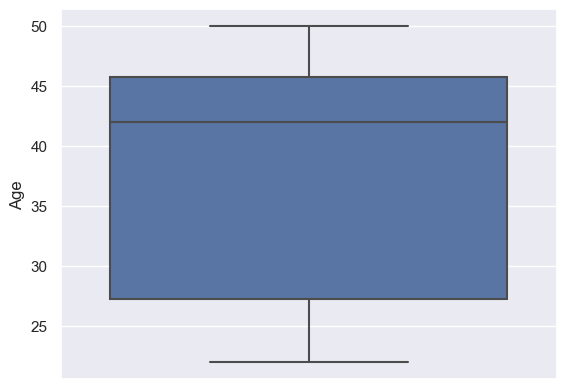

In [107]:
# Age and Experience - Numerical variables
# Mean or Median depending on outlier
# If outlier found median, If no outlier mean
sns.boxplot(y= 'Age', data=df)

<AxesSubplot:ylabel='Experience'>

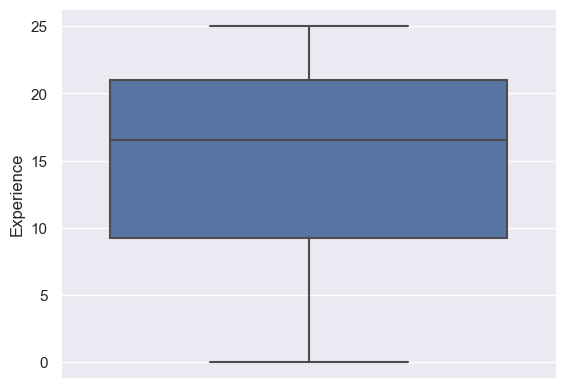

In [108]:
# No outlier : We can go with mean
sns.boxplot(y= 'Experience', data=df)

In [109]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

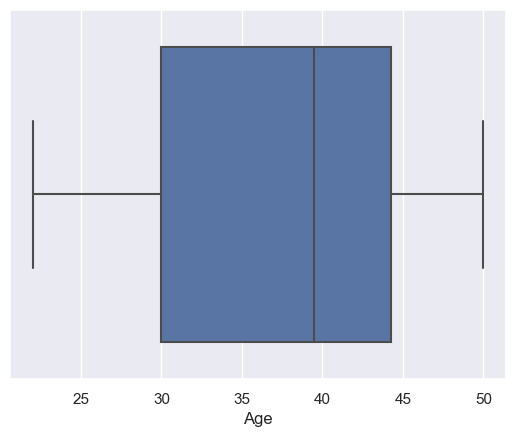

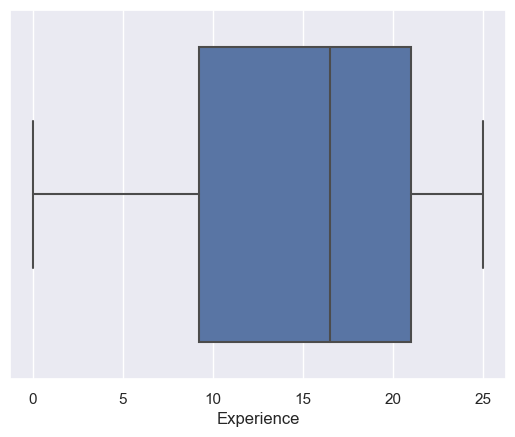

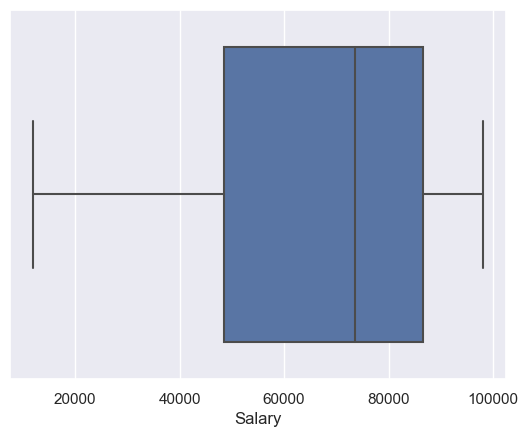

In [110]:
def boxplot(col):
    sns.boxplot(df[col])
    plt.show()
for i in list(df.select_dtypes(exclude=['object']).columns)[1:]:
    boxplot(i)

In [111]:
mydata.isnull().sum()

Employee Id     0
First Name      0
Last Name       0
Department     19
Age            18
Experience     10
Salary          0
dtype: int64

In [112]:
x = mydata.iloc[:,4:].values

In [113]:
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
x = simple_imputer.fit_transform(x)

In [114]:
pd.DataFrame(x).isnull().sum()

0    0
1    0
2    0
dtype: int64

# Encoding

In [115]:
df.head()

,Employee Id,First Name,Last Name,Department,Age,Experience,Salary
0,1,Joy,Bass,Sales and Marketing,28.0,3.0,32889
1,2,Sheila,Garza,Sales and Marketing,22.0,1.0,15944
2,3,John,Bryant,Customer Relations,22.0,1.0,40343
3,4,Christian,Farley,Customer Relations,22.0,1.0,19018
4,5,Colorado,Bowen,Accounting,27.0,0.0,24795


In [116]:
df_1 = df.iloc[:,3:]

In [117]:
df_1.head()

,Department,Age,Experience,Salary
0,Sales and Marketing,28.0,3.0,32889
1,Sales and Marketing,22.0,1.0,15944
2,Customer Relations,22.0,1.0,40343
3,Customer Relations,22.0,1.0,19018
4,Accounting,27.0,0.0,24795


In [118]:
df_1.isnull().sum()

Department     0
Age            0
Experience    10
Salary         0
dtype: int64

In [119]:
df_1['Experience'] = df_1['Experience'].fillna(df_1['Experience'].mean())

In [120]:
df_1.isnull().sum()

Department    0
Age           0
Experience    0
Salary        0
dtype: int64

In [121]:
df_1['Department'].value_counts()

Sales and Marketing    49
Accounting             27
Customer Relations     24
Name: Department, dtype: int64

In [122]:
# Label Encoder
df_1['Department'] = df_1['Department'].astype('category')
df_1['Department'] = df_1['Department'].cat.codes

In [123]:
df_1.head()

,Department,Age,Experience,Salary
0,2,28.0,3.0,32889
1,2,22.0,1.0,15944
2,1,22.0,1.0,40343
3,1,22.0,1.0,19018
4,0,27.0,0.0,24795


In [124]:
# One Hot Encoder
df_1 = pd.get_dummies(df_1, columns=['Department'])

In [125]:
df_1

,Age,Experience,Salary,Department_0,Department_1,Department_2
0,28.0,3.0,32889,0,0,1
1,22.0,1.0,15944,0,0,1
2,22.0,1.0,40343,0,1,0
3,22.0,1.0,19018,0,1,0
4,27.0,0.0,24795,1,0,0
...,...,...,...,...,...,...
95,47.0,22.0,79077,0,0,1
96,46.0,20.0,81187,0,0,1
97,44.0,18.0,83847,0,1,0
98,47.0,22.0,89158,0,1,0


In [126]:
# Dummy variable
df_1 = df_1.drop(['Department_1'], axis=1)

In [127]:
# Feature Scaling


In [128]:
# Standerdaisation
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_fc= sc_x.fit_transform(df_1)

In [129]:
sc_fc

array([[-1.16485118e+00, -1.81044925e+00, -1.23482325e+00,
        -6.08163641e-01,  1.02020406e+00],
       [-1.86547071e+00, -2.11817433e+00, -1.88508853e+00,
        -6.08163641e-01,  1.02020406e+00],
       [-1.86547071e+00, -2.11817433e+00, -9.48775604e-01,
        -6.08163641e-01, -9.80196059e-01],
       [-1.86547071e+00, -2.11817433e+00, -1.76712361e+00,
        -6.08163641e-01, -9.80196059e-01],
       [-1.28162110e+00, -2.27203688e+00, -1.54543093e+00,
         1.64429429e+00, -9.80196059e-01],
       [-1.39839102e+00, -1.50272416e+00, -1.90646343e+00,
         1.64429429e+00, -9.80196059e-01],
       [-1.63193087e+00, -1.34886162e+00, -1.18769869e+00,
        -6.08163641e-01, -9.80196059e-01],
       [-1.04808125e+00, -1.96431179e+00, -1.87914039e+00,
        -6.08163641e-01, -9.80196059e-01],
       [-1.04808125e+00, -1.50272416e+00, -8.81158761e-01,
        -6.08163641e-01,  1.02020406e+00],
       [-9.31311332e-01, -1.34886162e+00, -2.04062262e+00,
        -6.08163641e-01

In [130]:
# Normalisation
from sklearn.preprocessing import Normalizer
nor_x= Normalizer()
nor_x = nor_x.fit_transform(df_1)
nor_x

array([[8.51348163e-04, 9.12158746e-05, 9.99999633e-01, 0.00000000e+00,
        3.04052915e-05],
       [1.37982808e-03, 6.27194584e-05, 9.99999044e-01, 0.00000000e+00,
        6.27194584e-05],
       [5.45323767e-04, 2.47874439e-05, 9.99999851e-01, 0.00000000e+00,
        0.00000000e+00],
       [1.15679805e-03, 5.25817294e-05, 9.99999330e-01, 0.00000000e+00,
        0.00000000e+00],
       [1.08892857e-03, 0.00000000e+00, 9.99999406e-01, 4.03306879e-05,
        0.00000000e+00],
       [1.68973559e-03, 3.24949151e-04, 9.99998517e-01, 6.49898302e-05,
        0.00000000e+00],
       [7.03461432e-04, 1.75865358e-04, 9.99999737e-01, 0.00000000e+00,
        0.00000000e+00],
       [1.80135118e-03, 1.24231116e-04, 9.99998370e-01, 0.00000000e+00,
        0.00000000e+00],
       [6.88754136e-04, 1.18750713e-04, 9.99999755e-01, 0.00000000e+00,
        2.37501426e-05],
       [2.52290814e-03, 5.04581628e-04, 9.99996690e-01, 0.00000000e+00,
        0.00000000e+00],
       [7.49560135e-04, 1.4414

# EDA Cars

In [131]:
cars= pd.read_excel("EDA Cars.xlsx")
cars.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.24250,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,130794.57420,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [132]:
cars.isnull().sum()

INDEX              0
INCOME            43
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
POSTAL CODE        3
dtype: int64

In [133]:
columns= cars.columns
columns

Index(['INDEX', 'INCOME', 'MARITAL STATUS', 'SEX', 'EDUCATION', 'JOB',
       'TRAVEL TIME', 'USE', 'MILES CLOCKED', 'CAR TYPE', 'CAR AGE', 'CITY',
       'POSTAL CODE'],
      dtype='object')

<AxesSubplot:ylabel='INCOME'>

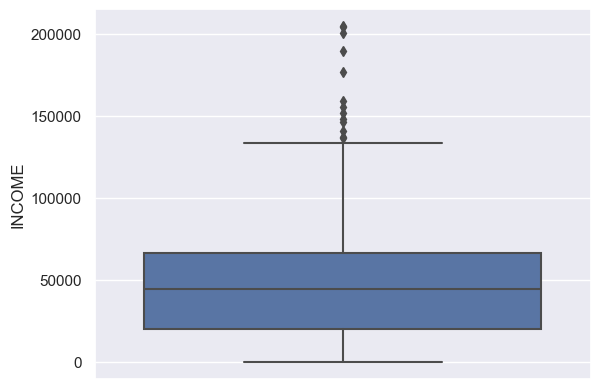

In [134]:
sns.boxplot(y= 'INCOME', data= cars)

In [135]:
cars['INCOME']= cars['INCOME'].fillna(cars['INCOME'].median())

In [136]:
# Handling outlier
def remove_outlier(col):
    sorted(col)
    Q1, Q3 =col.quantile([0.25, 0.75])
    IQR= Q3- Q1
    lower_range= Q1- (1.5* IQR)
    upper_range= Q3+ (1.5* IQR)
    return lower_range, upper_range

In [137]:
lr_income, up_income = remove_outlier(cars['INCOME'])

In [138]:
print(lr_income, up_income)

-38932.344305 125781.512695


In [139]:
cars['INCOME'] = np.where(cars['INCOME'] > up_income, up_income, cars['INCOME'])
cars['INCOME'] = np.where(cars['INCOME'] < lr_income, lr_income, cars['INCOME'])

<AxesSubplot:ylabel='INCOME'>

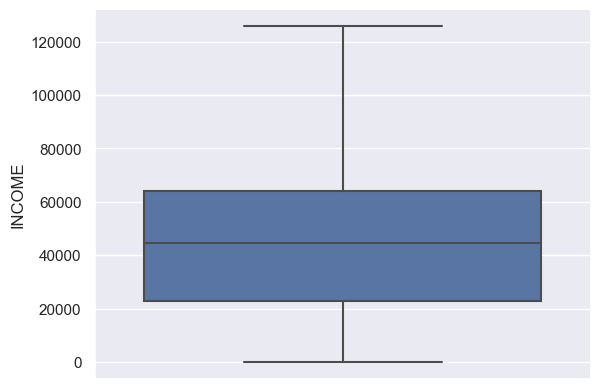

In [140]:
sns.boxplot(y= 'INCOME', data= cars)

In [141]:
cars.head()

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.242500,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.445310,No,M,High School,NaN,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.824160,NaN,F,Bachelors,Clerical,33.639949,Private,NaN,SUV,1.0,Texas,42420.0
3,4,77099.966240,No,F,NaN,Lawyer,15.415676,NaN,18300.0,Sports Car,11.0,Texas,42420.0
4,5,125781.512695,No,M,High School,NaN,NaN,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0


In [142]:
cars.isnull().sum()

INDEX              0
INCOME             0
MARITAL STATUS    28
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME       41
USE               53
MILES CLOCKED     25
CAR TYPE          10
CAR AGE           20
CITY               6
POSTAL CODE        3
dtype: int64

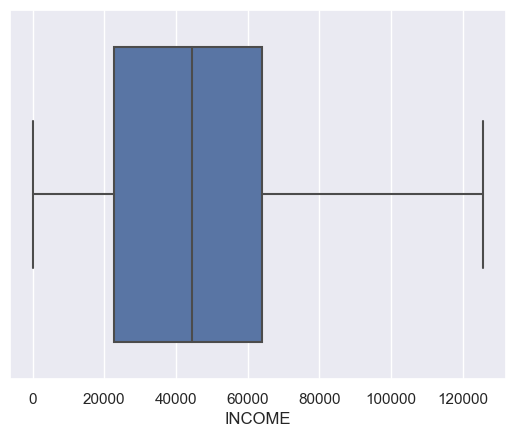

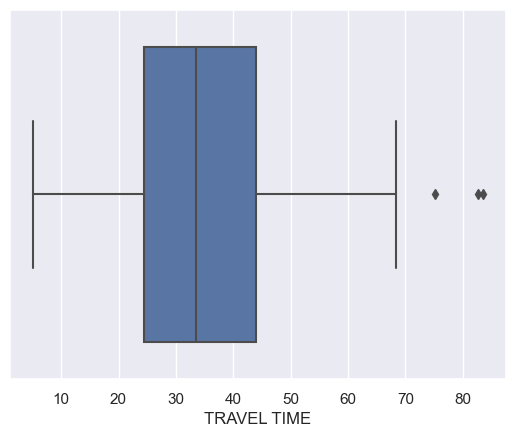

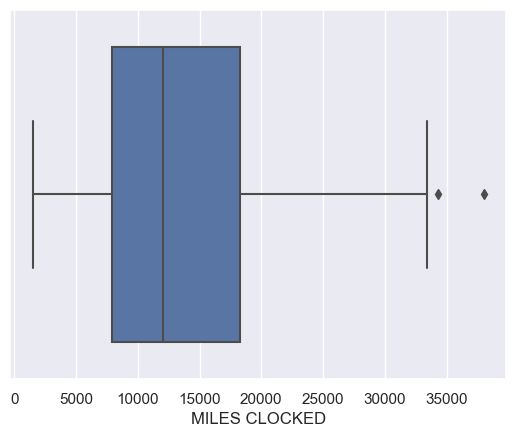

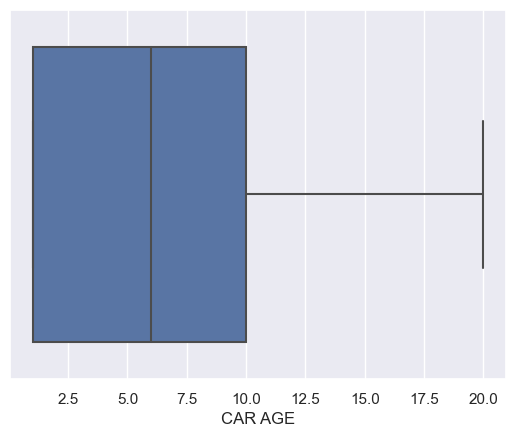

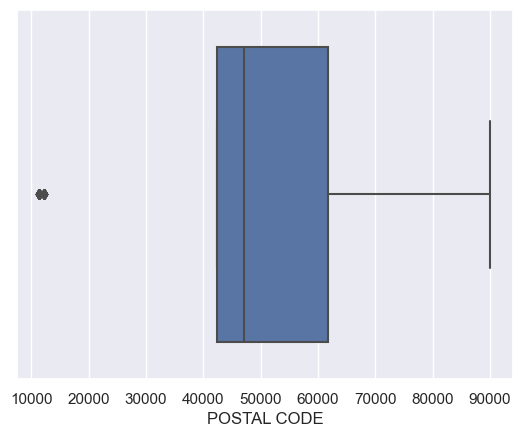

In [143]:
def boxplot(col):
    sns.boxplot(cars[col])
    plt.show()
for i in list(cars.select_dtypes(exclude=['object']).columns)[1:]:
    boxplot(i)

In [144]:
cars['POSTAL CODE'] = cars['POSTAL CODE'].fillna(cars['POSTAL CODE'].median())

In [145]:
cars['MILES CLOCKED'] = cars['MILES CLOCKED'].fillna(cars['MILES CLOCKED'].median())

In [146]:
cars['TRAVEL TIME'] = cars['TRAVEL TIME'].fillna(cars['TRAVEL TIME'].median())

In [147]:
cars['CAR AGE'] = cars['CAR AGE'].fillna(cars['CAR AGE'].median())

In [148]:
cars['MARITAL STATUS'].value_counts()

No     151
Yes    124
Name: MARITAL STATUS, dtype: int64

In [149]:
cars['MARITAL STATUS'] = cars['MARITAL STATUS'].fillna('No')

In [150]:
def value_count(col):
    print(cars[col].value_counts())
for i in list(cars.select_dtypes(include=['object']).columns)[1:]:
    value_count(i)

F    165
M    132
Name: SEX, dtype: int64
High School    161
Bachelors       54
Masters         38
PhD              6
Name: EDUCATION, dtype: int64
Blue Collar     96
Clerical        48
Student         30
Home Maker      27
Professional    23
Lawyer          15
Manager         14
Doctor           4
Name: JOB, dtype: int64
Private       133
Commercial    117
Name: USE, dtype: int64
SUV            93
Pickup         61
Sports Car     51
Minivan        38
Van            27
Panel Truck    23
Name: CAR TYPE, dtype: int64
Houston          39
Las Vegas        39
Seattle          36
Los Angeles      33
Washington       32
Columbia         28
San Francisco    27
New York City    23
Texas            22
New Albany       17
Philadelphia      1
Name: CITY, dtype: int64


In [151]:
cars.isnull().sum()

INDEX              0
INCOME             0
MARITAL STATUS     0
SEX                6
EDUCATION         44
JOB               46
TRAVEL TIME        0
USE               53
MILES CLOCKED      0
CAR TYPE          10
CAR AGE            0
CITY               6
POSTAL CODE        0
dtype: int64

In [152]:
from sklearn.impute import SimpleImputer
simple_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cars = simple_imputer.fit_transform(cars)

In [153]:
cars= pd.DataFrame(cars)

In [154]:
cars.columns= columns

In [155]:
cars

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.2425,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.44531,No,M,High School,Blue Collar,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.82416,No,F,Bachelors,Clerical,33.639949,Private,12065.0,SUV,1.0,Texas,42420.0
3,4,77099.96624,No,F,High School,Lawyer,15.415676,Private,18300.0,Sports Car,11.0,Texas,42420.0
4,5,125781.512695,No,M,High School,Blue Collar,33.564757,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,285,15251.52473,No,M,High School,Clerical,31.315058,Private,3030.0,Sports Car,1.0,Las Vegas,44412.0
299,286,18408.39545,No,M,High School,Clerical,42.619118,Private,7440.0,SUV,1.0,Las Vegas,47150.0
300,287,44571.59087,No,M,High School,Clerical,36.533624,Private,7660.0,SUV,6.0,Las Vegas,44412.0
301,288,44571.59087,Yes,F,High School,Blue Collar,60.884292,Private,19550.0,Van,1.0,Las Vegas,44412.0


In [156]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   INDEX           303 non-null    object
 1   INCOME          303 non-null    object
 2   MARITAL STATUS  303 non-null    object
 3   SEX             303 non-null    object
 4   EDUCATION       303 non-null    object
 5   JOB             303 non-null    object
 6   TRAVEL TIME     303 non-null    object
 7   USE             303 non-null    object
 8   MILES CLOCKED   303 non-null    object
 9   CAR TYPE        303 non-null    object
 10  CAR AGE         303 non-null    object
 11  CITY            303 non-null    object
 12  POSTAL CODE     303 non-null    object
dtypes: object(13)
memory usage: 30.9+ KB


In [157]:
col_to_float = ['INCOME', 'TRAVEL TIME', 'MILES CLOCKED', 'CAR AGE', 'POSTAL CODE']
for i in col_to_float:
    cars[i] = cars[i].astype(float)
cars

,INDEX,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,1,125301.242500,No,F,Bachelors,Blue Collar,45.703013,Commercial,17430.0,Sports Car,7.0,Texas,42420.0
1,2,50815.445310,No,M,High School,Blue Collar,20.591628,Private,18930.0,Minivan,1.0,Texas,42420.0
2,3,62977.824160,No,F,Bachelors,Clerical,33.639949,Private,12065.0,SUV,1.0,Texas,42420.0
3,4,77099.966240,No,F,High School,Lawyer,15.415676,Private,18300.0,Sports Car,11.0,Texas,42420.0
4,5,125781.512695,No,M,High School,Blue Collar,33.564757,Commercial,28340.0,Panel Truck,10.0,Texas,42420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,285,15251.524730,No,M,High School,Clerical,31.315058,Private,3030.0,Sports Car,1.0,Las Vegas,44412.0
299,286,18408.395450,No,M,High School,Clerical,42.619118,Private,7440.0,SUV,1.0,Las Vegas,47150.0
300,287,44571.590870,No,M,High School,Clerical,36.533624,Private,7660.0,SUV,6.0,Las Vegas,44412.0
301,288,44571.590870,Yes,F,High School,Blue Collar,60.884292,Private,19550.0,Van,1.0,Las Vegas,44412.0


In [ ]:
# Label Encoder
df_1['Department'] = df_1['Department'].astype('category')
df_1['Department'] = df_1['Department'].cat.codes

In [158]:
obj_col= list(cars.select_dtypes(include=['object']))
obj_col

['INDEX',
 'MARITAL STATUS',
 'SEX',
 'EDUCATION',
 'JOB',
 'USE',
 'CAR TYPE',
 'CITY']

In [160]:
for i in obj_col:
    cars[i] = cars[i].astype("category")
    cars[i] = cars[i].cat.codes
print(cars)

     INDEX         INCOME  MARITAL STATUS  SEX  EDUCATION  JOB  TRAVEL TIME  \
0        0  125301.242500               0    0          0    0    45.703013   
1        1   50815.445310               0    1          1    0    20.591628   
2        2   62977.824160               0    0          0    1    33.639949   
3        3   77099.966240               0    0          1    4    15.415676   
4        4  125781.512695               0    1          1    0    33.564757   
..     ...            ...             ...  ...        ...  ...          ...   
298    284   15251.524730               0    1          1    1    31.315058   
299    285   18408.395450               0    1          1    1    42.619118   
300    286   44571.590870               0    1          1    1    36.533624   
301    287   44571.590870               1    0          1    0    60.884292   
302    288       0.000000               0    1          0    7    11.657483   

     USE  MILES CLOCKED  CAR TYPE  CAR AGE  CITY  P

In [162]:
cars.drop('INDEX', axis=1)

,INCOME,MARITAL STATUS,SEX,EDUCATION,JOB,TRAVEL TIME,USE,MILES CLOCKED,CAR TYPE,CAR AGE,CITY,POSTAL CODE
0,125301.242500,0,0,0,0,45.703013,0,17430.0,4,7.0,9,42420.0
1,50815.445310,0,1,1,0,20.591628,1,18930.0,0,1.0,9,42420.0
2,62977.824160,0,0,0,1,33.639949,1,12065.0,3,1.0,9,42420.0
3,77099.966240,0,0,1,4,15.415676,1,18300.0,4,11.0,9,42420.0
4,125781.512695,0,1,1,0,33.564757,0,28340.0,1,10.0,9,42420.0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,15251.524730,0,1,1,1,31.315058,1,3030.0,4,1.0,2,44412.0
299,18408.395450,0,1,1,1,42.619118,1,7440.0,3,1.0,2,47150.0
300,44571.590870,0,1,1,1,36.533624,1,7660.0,3,6.0,2,44412.0
301,44571.590870,1,0,1,0,60.884292,1,19550.0,5,1.0,2,44412.0


In [163]:
# Standerdaisation
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
sc_fc= sc_x.fit_transform(cars)

In [164]:
sc_fc

array([[-1.63033792,  2.35879369, -0.83230849, ...,  0.15258993,
         1.28908174, -0.34427179],
       [-1.61857844,  0.10040956, -0.83230849, ..., -1.06411401,
         1.28908174, -0.34427179],
       [-1.60681895,  0.46916876, -0.83230849, ..., -1.06411401,
         1.28908174, -0.34427179],
       ...,
       [ 1.73287441, -0.088902  , -0.83230849, ..., -0.05019406,
        -0.78067025, -0.26121554],
       [ 1.74463389, -0.088902  ,  1.20147758, ..., -1.06411401,
        -0.78067025, -0.26121554],
       [ 1.75639338, -1.44029753, -0.83230849, ...,  0.15258993,
        -0.78067025, -0.26121554]])